## TASK

### Part 1 (Include 9.)

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\Víctor A\Desktop\CAREER FOUNDRY\Instacart Basket Analysis'

instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_final2.pkl'))

C:\Users\Víctor A\AppData\Local\Temp\ipykernel_220\2676008958.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loyalty_analysis = instacart.groupby('loyalty_flag').agg({


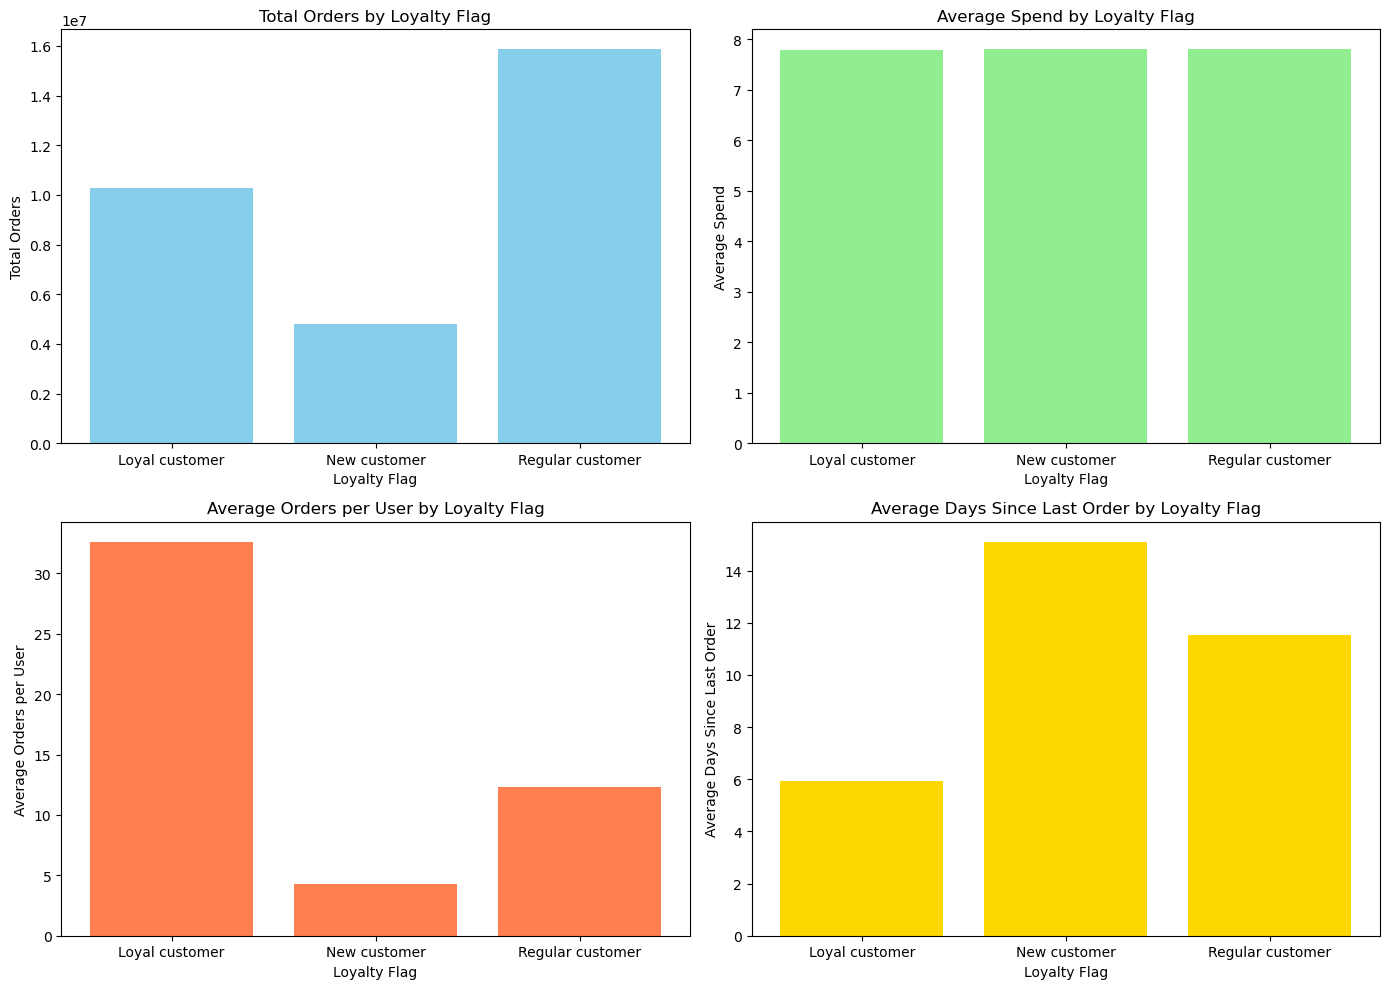

In [15]:
# Group by loyalty_flag and calculate key metrics
loyalty_analysis = instacart.groupby('loyalty_flag').agg({
    'order_id': 'count',  # Total number of orders
    'average_spend':'mean',  # Average spend per order
    'user_id': 'nunique',  # Number of unique users
    'order_number': 'mean',  # Average number of orders per user
    'days_since_last_order': 'mean'  # Average days since last order
}).reset_index()

# Rename columns for clarity
loyalty_analysis.columns = ['Loyalty Flag', 'Total Orders', 'Average Spend', 'Unique Users', 'Average Orders per User', 'Average Days Since Last Order']

# Visualization
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Total Orders
ax[0, 0].bar(loyalty_analysis['Loyalty Flag'], loyalty_analysis['Total Orders'], color='skyblue')
ax[0, 0].set_title('Total Orders by Loyalty Flag')
ax[0, 0].set_xlabel('Loyalty Flag')
ax[0, 0].set_ylabel('Total Orders')

# Average Spend
ax[0, 1].bar(loyalty_analysis['Loyalty Flag'], loyalty_analysis['Average Spend'], color='lightgreen')
ax[0, 1].set_title('Average Spend by Loyalty Flag')
ax[0, 1].set_xlabel('Loyalty Flag')
ax[0, 1].set_ylabel('Average Spend')

# Average Orders per User
ax[1, 0].bar(loyalty_analysis['Loyalty Flag'], loyalty_analysis['Average Orders per User'], color='coral')
ax[1, 0].set_title('Average Orders per User by Loyalty Flag')
ax[1, 0].set_xlabel('Loyalty Flag')
ax[1, 0].set_ylabel('Average Orders per User')

# Average Days Since Last Order
ax[1, 1].bar(loyalty_analysis['Loyalty Flag'], loyalty_analysis['Average Days Since Last Order'], color='gold')
ax[1, 1].set_title('Average Days Since Last Order by Loyalty Flag')
ax[1, 1].set_xlabel('Loyalty Flag')
ax[1, 1].set_ylabel('Average Days Since Last Order')

plt.tight_layout()
plt.show()


#### Are there differences in ordering habits based on a customer’s region?

In [5]:
pd.set_option('display.max_columns', None)
instacart.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,is_first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spending_flag,customer_frequency,frequency_flag,gender,state,age,date_joined,dependants,marital_status,income,region,low_activity_customer,customer_profile
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,3,False,5,0,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.937500,Low spender,8.0,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,False,Senior
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,20,False,1,1,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.937500,Low spender,8.0,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,False,Senior
2,1,Chocolate Sandwich Cookies,61,19,5.800781,389851,709,2,0,21,6,False,20,0,Mid-range product,Busiest day,Busiest day,Average orders,5,New customer,7.929688,Low spender,6.0,Frequent customer,Female,Vermont,66,2018-06-16,2,married,158302,Northeast,False,Senior
5,1,Chocolate Sandwich Cookies,61,19,5.800781,1701441,777,16,1,7,26,False,7,0,Mid-range product,Regularly busy,Busiest day,Average orders,26,Regular customer,6.933594,Low spender,11.0,Regular customer,Female,Hawaii,51,2019-01-04,2,married,57797,West,False,Family
6,1,Chocolate Sandwich Cookies,61,19,5.800781,1871483,825,3,2,14,30,False,2,0,Mid-range product,Regularly busy,Regularly busy,Most orders,9,New customer,5.957031,Low spender,19.0,Regular customer,Male,District of Columbia,20,2019-05-08,3,living with parents and siblings,34171,South,False,Afternoon Shopper


C:\Users\Víctor A\AppData\Local\Temp\ipykernel_6976\173372583.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for region, data in instacart.groupby('region'):
C:\Users\Víctor A\AppData\Local\Temp\ipykernel_6976\173372583.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for region, data in instacart.groupby('region'):


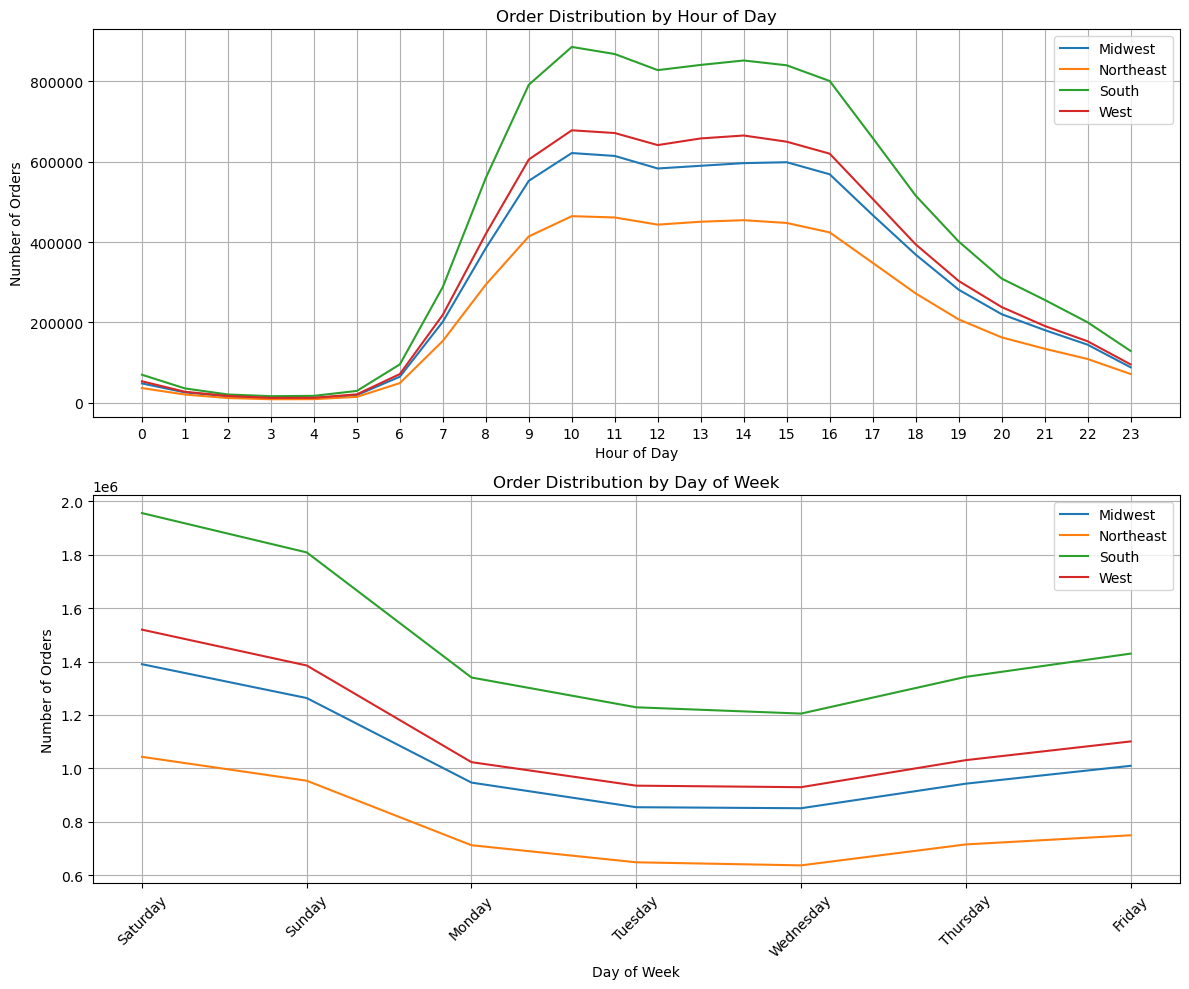

C:\Users\Víctor A\AppData\Local\Temp\ipykernel_6976\173372583.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_customers_by_region = instacart.groupby('region')['user_id'].nunique()


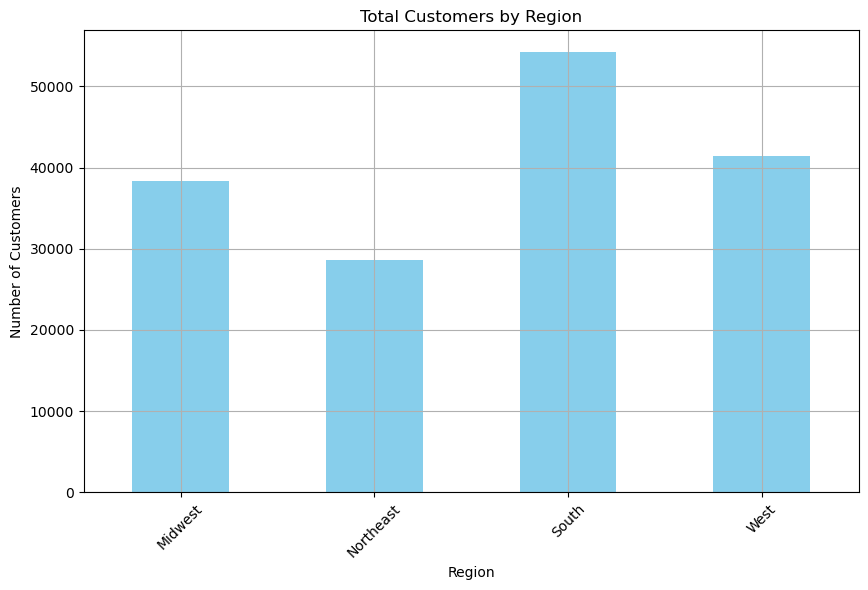

In [9]:
# 1. Visualizing order distribution throughout the day and week by region
plt.figure(figsize=(12, 10))

# Distribution of orders by hour of day
plt.subplot(2, 1, 1)
for region, data in instacart.groupby('region'):
    order_hour_counts = data['order_hour_of_day'].value_counts().sort_index()
    plt.plot(order_hour_counts.index, order_hour_counts.values, label=region)
plt.title('Order Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))
plt.legend()
plt.grid(True)

# Distribution of orders by day of the week
plt.subplot(2, 1, 2)
for region, data in instacart.groupby('region'):
    order_day_counts = data['orders_day_of_week'].value_counts().sort_index()
    plt.plot(order_day_counts.index, order_day_counts.values, label=region)
plt.title('Order Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.xticks(range(7), ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ordering distributions REGION.png'), bbox_inches='tight')
plt.show()

# 2. Analysis of customers by loyalty, spending, and frequency categories

# 3. Comparison of total number of customers by region
plt.figure(figsize=(10, 6))
total_customers_by_region = instacart.groupby('region')['user_id'].nunique()
total_customers_by_region.plot(kind='bar', color='skyblue')
plt.title('Total Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ordering habits REGION.png'), bbox_inches='tight')
plt.show()


	
### Is there a connection between age and family status in terms of ordering habits?

In [11]:
# Define age bins
age_bins = [18, 30, 45, 60, float('inf')]  # defining bins as [18-30], [31-45], [46-60], [>60]

# Define labels for age subgroups
age_labels = ['18-30 years', '31-45 years', '46-60 years', '>60 years']

# Create age_subgroups column
instacart['age_subgroups'] = pd.cut(instacart['age'], bins=age_bins, labels=age_labels, right=False)

MemoryError: Unable to allocate 236. MiB for an array with shape (30959687, 1) and data type object

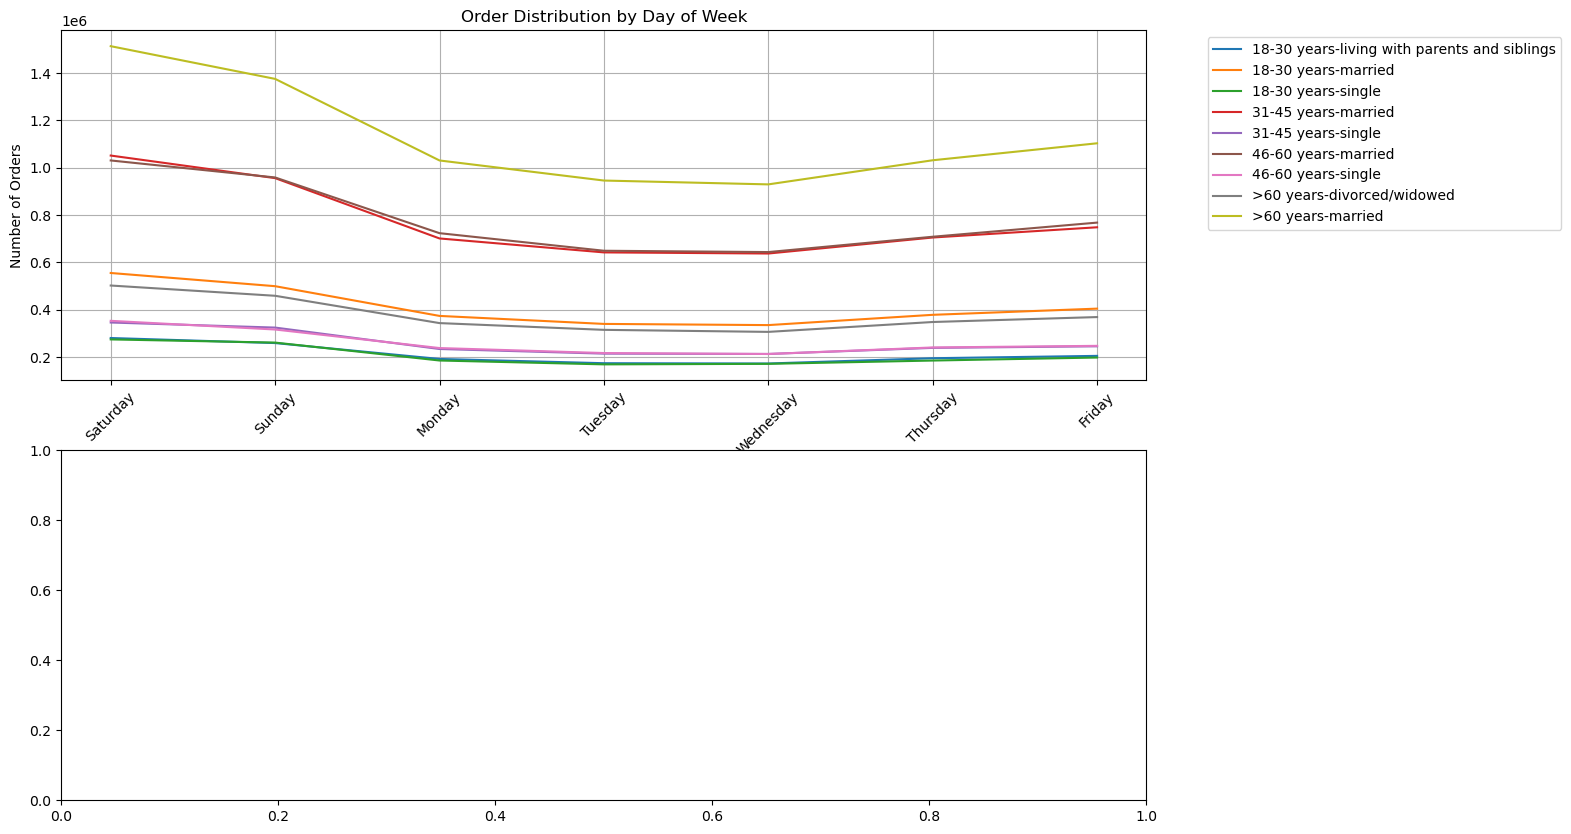

In [30]:
# Plot the distribution of orders by day of the week
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
for (age_group, marital_status), data in instacart.groupby(['age_subgroups', 'marital_status'], observed=True):
    # Calculate the order counts by day of the week
    order_day_counts = data['orders_day_of_week'].value_counts().sort_index()
    plt.plot(order_day_counts.index, order_day_counts.values, label=f'{age_group}-{marital_status}')
plt.title('Order Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.xticks(range(7), ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Plot the distribution of orders by hour of the day
plt.subplot(2, 1, 2)
for (age_group, marital_status), data in instacart.groupby(['age_subgroups', 'marital_status'], observed=True):
    # Calculate the order counts by hour of the day
    order_hour_counts = data['order_hour_of_day'].value_counts().sort_index()
    plt.plot(order_hour_counts.index, order_hour_counts.values, label=f'{age_group}-{marital_status}')
plt.title('Order Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()


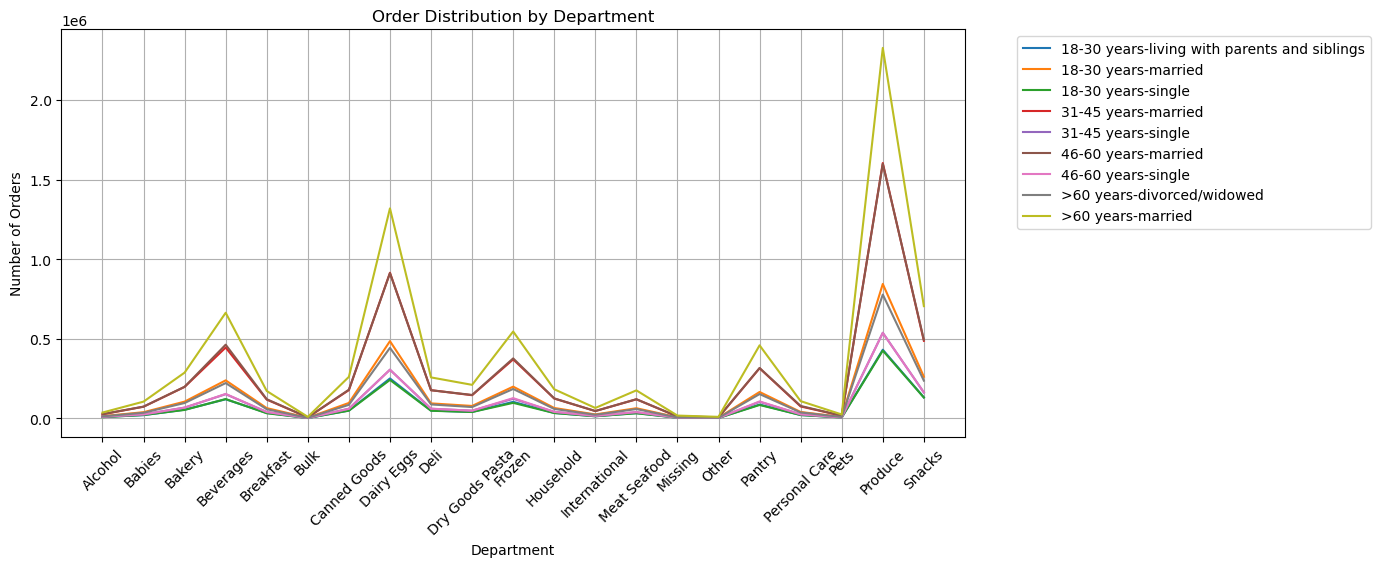

In [23]:
# Mapping department_id to department names
instacart['department_name'] = instacart['department_id'].map(department_names)

# Plot the distribution of orders by department
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
for (age_group, marital_status), data in instacart.groupby(['age_subgroups', 'marital_status'], observed=True):
    # Calculate the order counts by department
    order_dept_counts = data['department_name'].value_counts().sort_index()
    plt.plot(order_dept_counts.index, order_dept_counts.values, label=f'{age_group}-{marital_status}')
plt.title('Order Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ordering habits AGE AND FAMILY2.png'), bbox_inches='tight')
plt.show()
